In [1]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
    
from Jupytils.Charts import *;
%reload_ext rmagic 
%reload_ext rpy2.ipython
showTopbar("Facebook Prophet Asthma Prediction")

<IPython.core.display.Javascript object>

In [2]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies={"http": None, "https": None}
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef pef_zone so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
dff1.pef = dff1.pef.astype(float)

for i,u in enumerate(dff1.pef_zone.unique()):
    dff1.pef_zone[dff1.pef_zone == u]= i+1
dff1.pef_zone = dff1.pef_zone.astype(int)
df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


dfPM = df1[df1.ampm == 'pm'].copy();
allDays = pd.date_range(dfPM.sdttm.min(), dfPM.sdttm.max(), freq='D')
dfPM.index=dfPM.sdttm;
dfPM=dfPM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')

dfAMp= dfAM.copy()
for c in dfAMp.columns:
    if (dfAMp[c].dtype == number):
        scaler = StandardScaler()
        dfAMp[c] = scaler.fit_transform(dfAMp[c])
dfAMp   
dfAM


,sdttm,ampm,pef,pef_zone,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,airpressurehpa
2015-01-02 06:24:00,2015-01-02 06:24:00,am,279.000,1,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-03 06:24:00,2015-01-02 06:24:00,am,279.000,1,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-04 06:24:00,2015-01-03 07:19:00,am,251.000,1,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,71.000,2.100,1022.700
2015-01-05 06:24:00,2015-01-05 06:08:00,am,273.000,1,0.006,0.997,0.005,0.048,55.841,-2.800,0.000,100.000,5.000,1016.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,2016-10-15 06:00:00,am,300.000,2,0.005,0.787,0.011,0.045,79.103,11.400,0.100,100.000,13.400,1022.600
2016-10-17 06:24:00,2016-10-17 06:11:00,am,292.000,1,0.003,0.587,0.012,0.028,55.090,15.000,0.800,97.000,16.500,1013.400
2016-10-18 06:24:00,2016-10-18 06:00:00,am,286.000,1,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100
2016-10-19 06:24:00,2016-10-18 06:00:00,am,286.000,1,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100


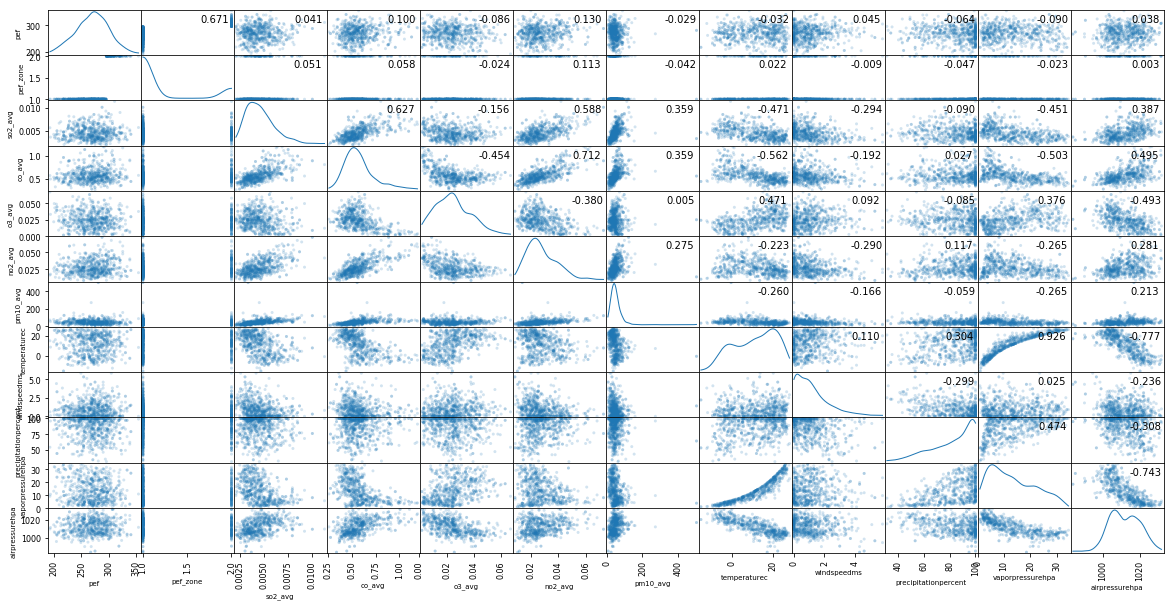

In [3]:
axes=scatter_matrix(dfAM, alpha=0.2, diagonal='kde', figsize=(20, 10)); # diagonal can be 'hist';
corr = dfAM.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [4]:
ddf=dfAMp;
PlotHCts(ddf, ddf.index, 'so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa airpressurehpa precipitationpercent pef_zone'.split(' '), title="Sample Chart for "+ patient );

In [5]:
from datetime import datetime
import fbprophet 
from fbprophet import Prophet

prdf = dfAM

prdf['ds'] = prdf.index
prdf['ds'] = pd.DatetimeIndex(prdf.ds)
prdf['y']  = prdf.pef
#importlib.reload(fbprophet.Prophet)

my_model1 = Prophet(interval_width=0.95)
#my_model1.extra_regressors={'so2': df1.so2,'co': df1.co, 'no2' :df1.no2, 'precipitationpercent': df1.precipitationpercent}
my_model1.fit(prdf);
prdf=prdf['ds y'.split()]
prdf.index=range(0, len(prdf))
prdf

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
0,2015-01-02 06:24:00,279.000
1,2015-01-03 06:24:00,279.000
2,2015-01-04 06:24:00,251.000
3,2015-01-05 06:24:00,273.000
...,...,...
653,2016-10-16 06:24:00,300.000
654,2016-10-17 06:24:00,292.000
655,2016-10-18 06:24:00,286.000
656,2016-10-19 06:24:00,286.000


In [6]:
future_dates = my_model1.make_future_dataframe(periods=36)#, freq='12h')
display(future_dates[-37::])
forecast = my_model1.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds
656,2016-10-19 06:24:00
657,2016-10-20 06:24:00
658,2016-10-21 06:24:00
659,2016-10-22 06:24:00
...,...
689,2016-11-21 06:24:00
690,2016-11-22 06:24:00
691,2016-11-23 06:24:00
692,2016-11-24 06:24:00


,ds,yhat,yhat_lower,yhat_upper
688,2016-11-20 06:24:00,256.494,204.648,308.736
689,2016-11-21 06:24:00,257.870,202.063,310.035
690,2016-11-22 06:24:00,264.121,212.784,312.741
691,2016-11-23 06:24:00,259.633,209.096,311.233
692,2016-11-24 06:24:00,262.405,214.922,310.795


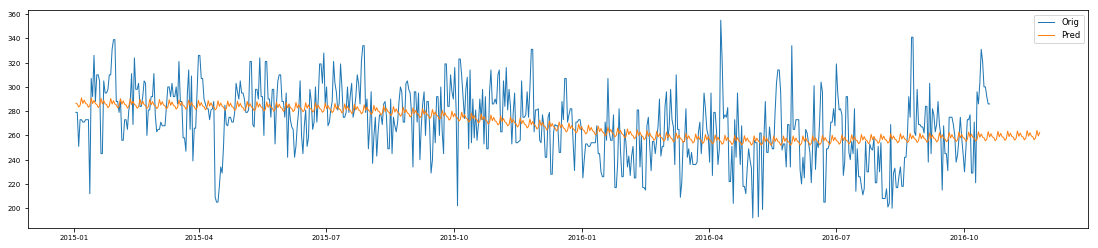

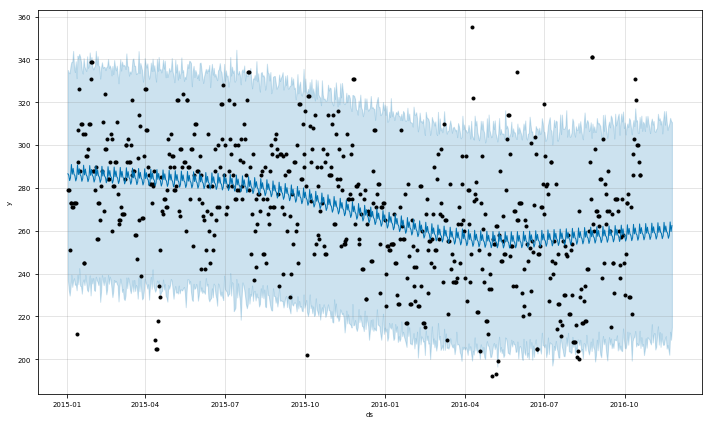

In [7]:
fig=plt.figure(figsize=(19,4) )
plt.plot(prdf.ds, prdf.y, label="Orig")
plt.plot(forecast.ds, forecast.yhat, label="Pred")
plt.legend()
df1
my_model1.plot(forecast, uncertainty=True);


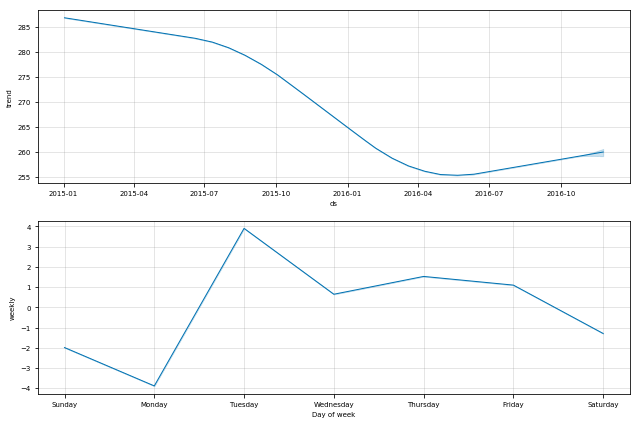

In [8]:
my_model1.plot_components(forecast);

-----
###  SECOND DATA SET 
#### Airline Passenger Prediction using Prophet